# Task 1: Feature Preparation


## Preprosessing and Cleaning of Data

In [37]:
# Importing all basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

In [38]:
# Class labels defined as classes in classificaition are labels 0-5, accesing names are done through this class_list
class_list = ['@BearGrylls' , '@davidguetta'  , '@ddlovato' , '@FCBarcelona' , '@FIFAWorldCup' , '@MarvelStudios' ]

In [39]:
# Connected to google drive to access all tweets's csv files.
# Project done on google colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# Extractiion of tweets are done through VICINITAS.io, extracted 3200 tweets for every user possible for all 6 of our members of our group

data_frames = []
df1 = pd.read_excel("/content/drive/MyDrive/@BearGrylls_user_tweets.xlsx")
data_frames.append(df1)
df2 = pd.read_excel("/content/drive/MyDrive/@davidguetta_user_tweets.xlsx")
data_frames.append(df2)
df3 = pd.read_excel("/content/drive/MyDrive/@ddlovato_user_tweets.xlsx")
data_frames.append(df3)
df4 = pd.read_excel("/content/drive/MyDrive/@FCBarcelona_user_tweets.xlsx")
data_frames.append(df4)
df5 = pd.read_excel("/content/drive/MyDrive/@FIFAWorldCup_user_tweets.xlsx")
data_frames.append(df5)
df6 = pd.read_excel("/content/drive/MyDrive/@MarvelStudios_user_tweets.xlsx")
data_frames.append(df6)

In [41]:
tweets = []
labels = []
# Count used to append labels to label list
count = 0
for df in data_frames:
    # Grabing the tweet and tweet type columns
    df = df[['Text', 'Tweet Type']] 
    data = np.array(df)
    tweeter = []
    # Removing retweets
    for row in data:
        if row[1] == 'Tweet':
            tweeter.append(row[0])            
    # Selcting the first 1000 tweets out oof 3200
    tweeter = tweeter[0:1000]
    tweeter = np.array(tweeter)
    
    for tweet in tweeter:
        tweets.append(tweet)
        labels.append(count)
    # Incrimenting label to change class
    count += 1

In [42]:
import re

# Accessing our stop words, used from our previoous assignment

swf = open("/content/drive/MyDrive/stop_words.txt","r", encoding="utf8")
stop_words = [line.strip() for line in swf.readlines()]

# Cleaninig out data

print('Before:\n',tweets[0:10])

for i,tweet in enumerate(tweets,0):
    # remove url
    tweet = re.sub(r'https://[^ ]+', '', tweet)
    # remove usernames
    tweet = re.sub(r'@[^ ]+', '', tweet)
    # remove # symbol
    tweet = re.sub(r'#', '', tweet)
    # remove new lines
    tweet = re.sub(r'\n',' ',tweet)    
    # remove punctuation, special characters and numbers
    tweet = re.sub(r'[^A-Za-z ]', '', tweet)
    # convert to lowercase
    tweet = tweet.lower()
    # remove stop words
    pattern = re.compile(r'\b(' + r'|'.join(stop_words) + r')\b\s*')
    tweet = pattern.sub('', tweet)
    # remove multiple spaces 
    tweet = re.sub(' +', ' ', tweet)
    # change value in list
    tweets[i] = tweet
    
print('After:\n',tweets[0:10])

Before:
 ['Island training is my favourite! Drop off the bar and you’re in the sea… @bemilitaryfit @AncestralSupps @theBGAdventure #adventure #stateofmind #nevergiveup https://t.co/OIcCMpSQro', 'The people you should aim to make proud in your life… do you agree?! @outdoors_dotcom @theBGAdventure @BGSurvival @Gonewildfest @BecomingXteam @AncestralSupps @bemilitaryfit @YoungBearGrylls #adventure #stateofmind #nevergiveup https://t.co/Q9c9p9wB1I', 'Bear Grylls visits Kyiv for new programme with Zelensky\n https://t.co/21aZDElsfS', 'This week I had the privilege to travel to Ukraine’s capital, Kyiv, and spend time with President Zelensky. It has been an experience for me like no other.', 'Bear Grylls Confirms His Latest Quest Into Ukraine to meet with President Zelensky - https://t.co/UNVZNe7eLW https://t.co/GVzMHSFDDM', 'Bear Grylls, Savage Ventures To Acquire, Expand https://t.co/UNVZNe7eLW!!!! https://t.co/inXbvWBgaL', 'BIG ANNOUNCEMENT!\n\nWe’ve purchased and relaunched the inspiration

In [43]:
from sklearn.model_selection import train_test_split
# Doing a 80:20 split for our data for bag of words and shuffling for better accuracy
btrainX, btestX, btrain_y, btest_y = train_test_split(tweets,labels,test_size=0.2, random_state=4)

##Task 1.1: Bag of Word Features

In [44]:
def make_vocab(tweets):
    vocab = set()
    for tweet in tweets:
        tweet = tweet.split()
        for word in tweet:
            vocab.add(word)
    vocab = list(vocab)
    return vocab

def feature_selection(tweets):
    vocab = []
    for tweet in tweets:
        tweet = tweet.split()
        for word in tweet:
            vocab.append(word)
            
    feauture_selected_vocab=[]
    uniques=list(set(vocab))
    for unique in uniques:
      if vocab.count(unique)>7:
        feauture_selected_vocab.append(unique)
    return feauture_selected_vocab

def bow(tweets, vocab):
    # Creae index list of each word in vocab
    indices = {}
    for i,word in enumerate(vocab,0):
        indices[word] = i
        
    # Bag of words
    bag_of_words = []
    # create word vectors
    for tweet in tweets:
        vector = [1]*len(vocab) # Start every count with 1 (Add 1 smoothing)
        tweet = tweet.split()
        for word in tweet:
            if word in vocab: # Ignore OOV words
                i = indices[word]
                vector[i] += 1
        bag_of_words.append(vector)
    return np.array(bag_of_words)

vocab = make_vocab(btrainX)
reduced_vocab= feature_selection(btrainX)
# Making train and test bag of words
train_bow = bow(btrainX,reduced_vocab)
test_bow = bow(btestX,reduced_vocab)

In [45]:
print(len(vocab))
print(len(reduced_vocab))

6392
853


## Task 1.2: Embeddings

In [46]:
pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
# Encoding tweets to embeddings
embeddings = model.encode(tweets)

In [48]:
# Doing a 80:20 split for our data for embeddings and shuffling for better accuracy
etrainX, etestX, etrain_y, etest_y = train_test_split(embeddings, labels, test_size=0.2, random_state=4)

#Task 2: KNNs

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Function to display all information required to analyze our model
def printing_confusion_matrix(true_labels, predicted_labels):
    plt.figure()
    plt.figure(figsize = (16,7))
    map = sns.heatmap(confusion_matrix(predicted_labels, true_labels), cmap="YlGnBu", annot = True, linewidths=.5, fmt='.3g')
    map.set(xlabel='Actual', ylabel='Predicted Class')
    map.set_title('Confusion Matrix of our classifier')
    plt.show()

    print("\n\tAccuracy score =", accuracy_score(predicted_labels, true_labels))
    print("\n\t\tCLASSIFICATION REPORT:\n\n", classification_report(predicted_labels, true_labels))

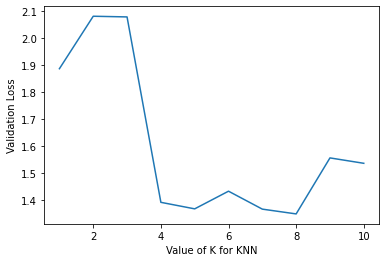

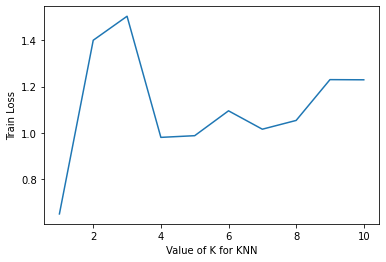

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 11)
k_val_scores = []
k_tra_scores = []

# Tuning value of K for KNN
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Cross validating on 5 folds, using mean square error for analyzing
    training_loss = cross_validate(knn, train_bow, btrain_y, cv=5, return_train_score = True, scoring='neg_mean_squared_error')
    k_tra_scores.append(abs(training_loss['train_score']).mean())
    k_val_scores.append(abs(training_loss['test_score']).mean())

#Plotting Validation loss
plt.plot(k_range, k_val_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Validation Loss')
plt.show()

#Plotting Training loss
plt.plot(k_range, k_tra_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Train Loss')
plt.show()

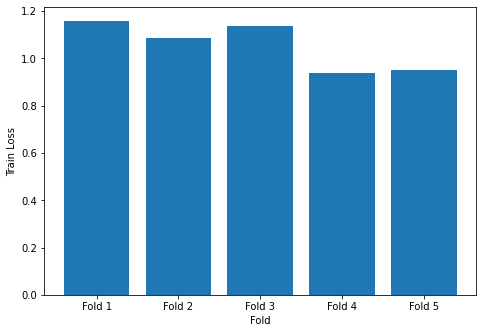

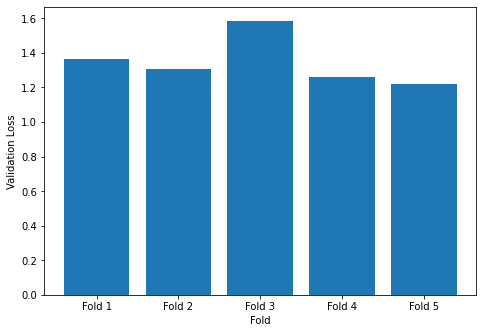

<Figure size 432x288 with 0 Axes>

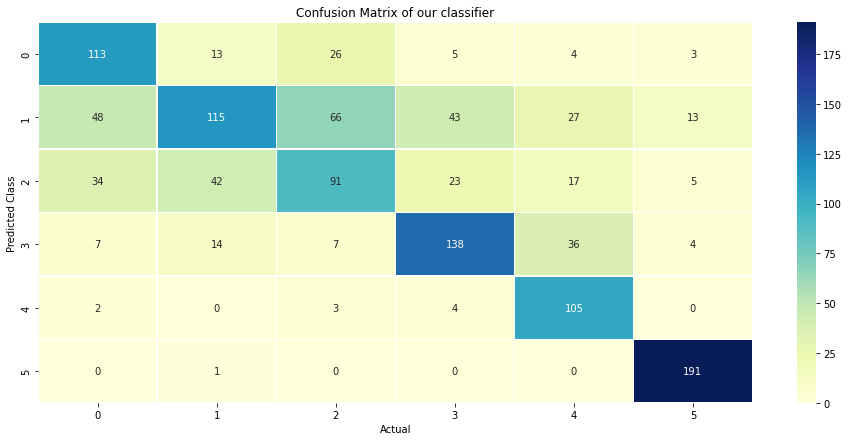


	Accuracy score = 0.6275

		CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.55      0.69      0.61       164
           1       0.62      0.37      0.46       312
           2       0.47      0.43      0.45       212
           3       0.65      0.67      0.66       206
           4       0.56      0.92      0.69       114
           5       0.88      0.99      0.94       192

    accuracy                           0.63      1200
   macro avg       0.62      0.68      0.64      1200
weighted avg       0.63      0.63      0.61      1200



In [51]:
# From the above cross validation we observe that the best value for k is 8

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate


# Using a KNN model for classification
knn = KNeighborsClassifier(n_neighbors = 8, metric = "euclidean")

# Cross validating on 5 folds for training on whole train data
training_loss_final = cross_validate(knn, train_bow, btrain_y, cv=5, return_train_score = True, scoring='neg_mean_squared_error')

# Plotting training and validation losses for all 5 folds of final cross validation.
final1 = abs(training_loss_final['train_score'])
final2 = abs(training_loss_final['test_score'])

folds = ["Fold 1", "Fold 2","Fold 3","Fold 4","Fold 5"]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(folds,final1)
plt.xlabel('Fold')
plt.ylabel('Train Loss')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(folds,final2)
plt.xlabel('Fold')
plt.ylabel('Validation Loss')
plt.show()

# Fitting our model
knn.fit(train_bow, btrain_y)
# Predicting and evaluating on test data
y_pred = knn.predict(test_bow)
printing_confusion_matrix(btest_y, y_pred)

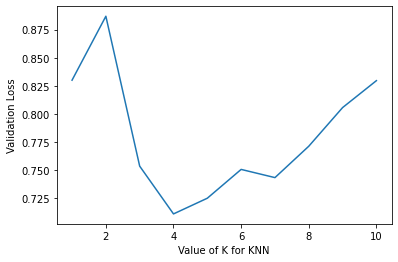

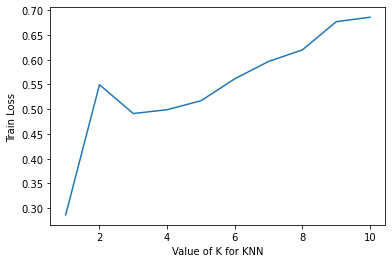

In [52]:
# Repeating cross validation for embeddings

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt

k_range = range(1, 11)
k_val_scores = []
k_tra_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    training_loss = cross_validate(knn, etrainX, etrain_y, cv=5, return_train_score = True, scoring='neg_mean_squared_error')
    k_tra_scores.append(abs(training_loss['train_score']).mean())
    k_val_scores.append(abs(training_loss['test_score']).mean())

plt.plot(k_range, k_val_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Validation Loss')
plt.show()

plt.plot(k_range, k_tra_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Train Loss')
plt.show()

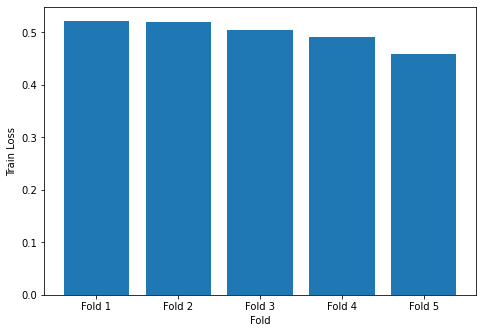

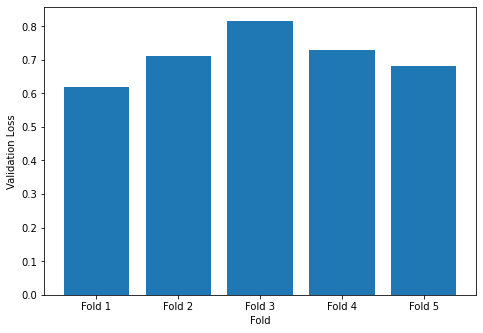

<Figure size 432x288 with 0 Axes>

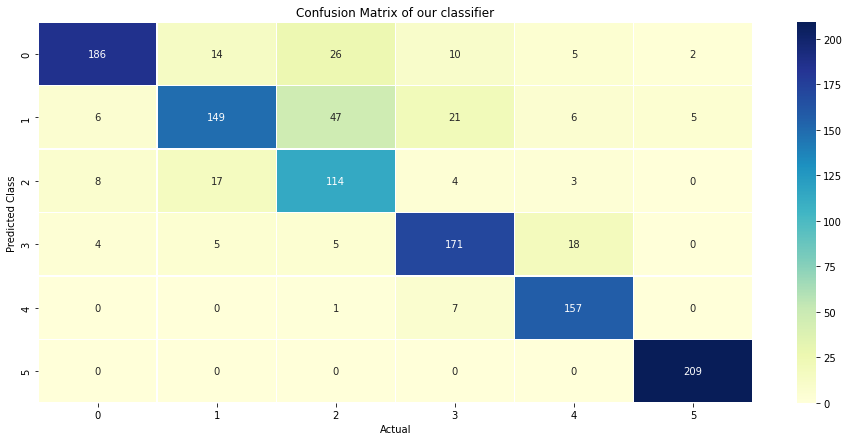


	Accuracy score = 0.8216666666666667

		CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.91      0.77      0.83       243
           1       0.81      0.64      0.71       234
           2       0.59      0.78      0.67       146
           3       0.80      0.84      0.82       203
           4       0.83      0.95      0.89       165
           5       0.97      1.00      0.98       209

    accuracy                           0.82      1200
   macro avg       0.82      0.83      0.82      1200
weighted avg       0.83      0.82      0.82      1200



In [53]:
#From the above cross validation we observe that the best value for k is 4

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors = 4, metric = "euclidean")

training_loss_final = cross_validate(knn, etrainX, etrain_y, cv=5, return_train_score = True, scoring='neg_mean_squared_error')
final1 = abs(training_loss_final['train_score'])
final2 = abs(training_loss_final['test_score'])

# Plotting training and validation losses for all 5 folds of final cross validation.
folds = ["Fold 1", "Fold 2","Fold 3","Fold 4","Fold 5"]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(folds,final1)
plt.xlabel('Fold')
plt.ylabel('Train Loss')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(folds,final2)
plt.xlabel('Fold')
plt.ylabel('Validation Loss')
plt.show()


# Fitting our model
knn.fit(etrainX, etrain_y)
# Predicting and evaluating on test data

y_pred = knn.predict(etestX)
printing_confusion_matrix(etest_y, y_pred)

#Task 3: Neural Networks

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [55]:
# Cross validatiing for MLP

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt

# Varying the activation functions
a_range = ['relu', 'logistic', 'tanh', 'identity']
bdata_val = {}
bdata_tra = {}

for a in a_range:
    clf = MLPClassifier(hidden_layer_sizes=(100,500,100), max_iter=100, activation = a, learning_rate = 'adaptive', verbose='true')
    training_loss = cross_validate(clf, train_bow, btrain_y, cv=5, return_train_score = True, scoring='neg_mean_squared_error')
    bdata_tra[a] = abs(training_loss['train_score']).mean()
    bdata_val[a] = abs(training_loss['test_score']).mean()

Iteration 1, loss = 1.81339272
Iteration 2, loss = 1.77018681
Iteration 3, loss = 1.70863305
Iteration 4, loss = 1.64771814
Iteration 5, loss = 1.52313351
Iteration 6, loss = 1.51362744
Iteration 7, loss = 1.72508611
Iteration 8, loss = 1.48025178
Iteration 9, loss = 1.41506244
Iteration 10, loss = 1.41794122
Iteration 11, loss = 1.40332759
Iteration 12, loss = 1.39759664
Iteration 13, loss = 1.35094945
Iteration 14, loss = 1.32464128
Iteration 15, loss = 1.35793141
Iteration 16, loss = 1.29989110
Iteration 17, loss = 1.23924704
Iteration 18, loss = 2.09226503
Iteration 19, loss = 1.46504765
Iteration 20, loss = 1.26768960
Iteration 21, loss = 1.24992453
Iteration 22, loss = 1.38573232
Iteration 23, loss = 1.22320321
Iteration 24, loss = 1.21076484
Iteration 25, loss = 1.22402130
Iteration 26, loss = 1.25754613
Iteration 27, loss = 1.28697677
Iteration 28, loss = 1.23385716
Iteration 29, loss = 1.20201885
Iteration 30, loss = 1.17440326
Iteration 31, loss = 1.25723752
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.81420971
Iteration 2, loss = 1.77107879
Iteration 3, loss = 1.75746505
Iteration 4, loss = 1.65870935
Iteration 5, loss = 1.67047140
Iteration 6, loss = 1.49883214
Iteration 7, loss = 1.42557467
Iteration 8, loss = 1.38619171
Iteration 9, loss = 2.00169833
Iteration 10, loss = 1.78316568
Iteration 11, loss = 1.72496967
Iteration 12, loss = 1.59042416
Iteration 13, loss = 1.46153116
Iteration 14, loss = 1.38125487
Iteration 15, loss = 1.70121446
Iteration 16, loss = 1.42106910
Iteration 17, loss = 1.30862094
Iteration 18, loss = 1.51617275
Iteration 19, loss = 1.51027151
Iteration 20, loss = 1.30228442
Iteration 21, loss = 1.23845553
Iteration 22, loss = 1.29300435
Iteration 23, loss = 1.24613687
Iteration 24, loss = 1.22738563
Iteration 25, loss = 1.18940679
Iteration 26, loss = 1.21078092
Iteration 27, loss = 1.25671719
Iteration 28, loss = 1.17727479
Iteration 29, loss = 1.16167241
Iteration 30, loss = 1.18232957
Iteration 31, loss = 1.20628085
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.81841919
Iteration 2, loss = 1.80963676
Iteration 3, loss = 1.79585699
Iteration 4, loss = 1.79903041
Iteration 5, loss = 1.79379529
Iteration 6, loss = 1.79384450
Iteration 7, loss = 1.79635122
Iteration 8, loss = 1.79517853
Iteration 9, loss = 1.79399252
Iteration 10, loss = 1.79267736
Iteration 11, loss = 1.79138166
Iteration 12, loss = 1.78281594
Iteration 13, loss = 1.76413073
Iteration 14, loss = 1.69360227
Iteration 15, loss = 1.56950975
Iteration 16, loss = 1.48317557
Iteration 17, loss = 1.44533739
Iteration 18, loss = 1.42250034
Iteration 19, loss = 1.41667877
Iteration 20, loss = 1.38775535
Iteration 21, loss = 1.37209673
Iteration 22, loss = 1.36107616
Iteration 23, loss = 1.37403754
Iteration 24, loss = 1.33929662
Iteration 25, loss = 1.31065774
Iteration 26, loss = 1.27571986
Iteration 27, loss = 1.25959699
Iteration 28, loss = 1.27878604
Iteration 29, loss = 1.28095970
Iteration 30, loss = 1.26019188
Iteration 31, loss = 1.24443950
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.80624422
Iteration 2, loss = 1.79692677
Iteration 3, loss = 1.79791896
Iteration 4, loss = 1.79822951
Iteration 5, loss = 1.79666530
Iteration 6, loss = 1.79829443
Iteration 7, loss = 1.79438560
Iteration 8, loss = 1.79477451
Iteration 9, loss = 1.79261140
Iteration 10, loss = 1.78212484
Iteration 11, loss = 1.74138297
Iteration 12, loss = 1.62323140
Iteration 13, loss = 1.49147640
Iteration 14, loss = 1.44857771
Iteration 15, loss = 1.44521727
Iteration 16, loss = 1.43706530
Iteration 17, loss = 1.43131828
Iteration 18, loss = 1.41968381
Iteration 19, loss = 1.46873445
Iteration 20, loss = 1.42240922
Iteration 21, loss = 1.39832165
Iteration 22, loss = 1.39181965
Iteration 23, loss = 1.37128358
Iteration 24, loss = 1.37530262
Iteration 25, loss = 1.36280144
Iteration 26, loss = 1.30880821
Iteration 27, loss = 1.28880962
Iteration 28, loss = 1.35505879
Iteration 29, loss = 1.27982362
Iteration 30, loss = 1.25681496
Iteration 31, loss = 1.25464701
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.80685940
Iteration 2, loss = 1.80200784
Iteration 3, loss = 1.79925482
Iteration 4, loss = 1.79659301
Iteration 5, loss = 1.79889914
Iteration 6, loss = 1.79661000
Iteration 7, loss = 1.79227208
Iteration 8, loss = 1.78126980
Iteration 9, loss = 1.75322409
Iteration 10, loss = 1.67643906
Iteration 11, loss = 1.55193907
Iteration 12, loss = 1.45283726
Iteration 13, loss = 1.43917695
Iteration 14, loss = 1.41197390
Iteration 15, loss = 1.42375766
Iteration 16, loss = 1.44861005
Iteration 17, loss = 1.39342572
Iteration 18, loss = 1.40405032
Iteration 19, loss = 1.39053694
Iteration 20, loss = 1.35991545
Iteration 21, loss = 1.36445793
Iteration 22, loss = 1.35313803
Iteration 23, loss = 1.32136407
Iteration 24, loss = 1.28556578
Iteration 25, loss = 1.26652270
Iteration 26, loss = 1.29793165
Iteration 27, loss = 1.31517618
Iteration 28, loss = 1.24640282
Iteration 29, loss = 1.25552885
Iteration 30, loss = 1.24263708
Iteration 31, loss = 1.23947414
Iteration 32, los

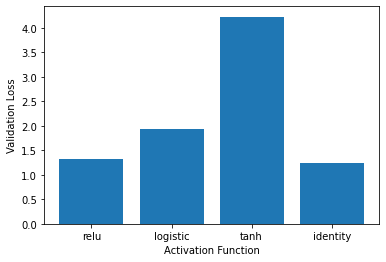

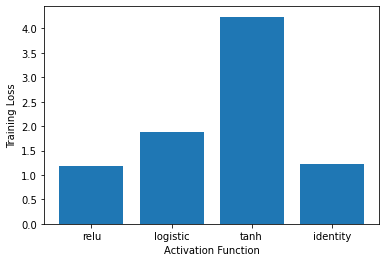

In [56]:
# Plotting validation and training loss on all activation functions
import matplotlib.pyplot as plt

names = list(bdata_val.keys())
values = list(bdata_val.values())

plt.bar(range(len(bdata_val)), values, tick_label=names)
plt.xlabel("Activation Function")
plt.ylabel("Validation Loss")
plt.show()

names = list(bdata_tra.keys())
values = list(bdata_tra.values())

plt.bar(range(len(bdata_tra)), values, tick_label=names)
plt.xlabel("Activation Function")
plt.ylabel("Training Loss")
plt.show()

In [57]:
# Using an MLP Classifier to train on whole train data and evaluating on test data
# Using identity activation function which had best results
clf = MLPClassifier(hidden_layer_sizes=(100,500,100), max_iter=100, activation = 'identity', learning_rate = 'adaptive', verbose='true')


training_loss_final = cross_validate(clf, train_bow, btrain_y, cv=5, return_train_score = True, scoring='neg_mean_squared_error')
final1 = abs(training_loss_final['train_score'])
final2 = abs(training_loss_final['test_score'])

Iteration 1, loss = 3.07276284
Iteration 2, loss = 1.81103289
Iteration 3, loss = 1.71037269
Iteration 4, loss = 1.61669606
Iteration 5, loss = 1.53115041
Iteration 6, loss = 1.40538771
Iteration 7, loss = 1.88512460
Iteration 8, loss = 1.65733498
Iteration 9, loss = 1.42023727
Iteration 10, loss = 1.35693764
Iteration 11, loss = 1.26170964
Iteration 12, loss = 1.24642648
Iteration 13, loss = 1.22691268
Iteration 14, loss = 1.35556660
Iteration 15, loss = 1.24858306
Iteration 16, loss = 1.16961995
Iteration 17, loss = 1.11990707
Iteration 18, loss = 1.17084933
Iteration 19, loss = 1.11013523
Iteration 20, loss = 1.33673562
Iteration 21, loss = 1.21925542
Iteration 22, loss = 1.11087339
Iteration 23, loss = 1.06496380
Iteration 24, loss = 1.09170031
Iteration 25, loss = 1.89984474
Iteration 26, loss = 1.72869541
Iteration 27, loss = 1.28806085
Iteration 28, loss = 1.11956286
Iteration 29, loss = 1.05288949
Iteration 30, loss = 1.01890540
Iteration 31, loss = 1.05085730
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


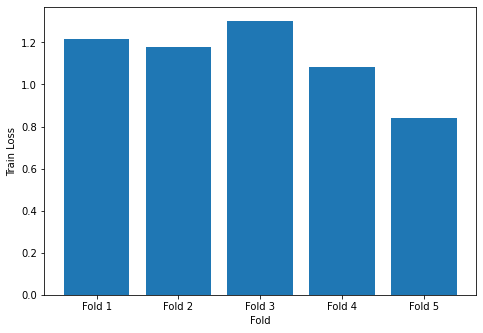

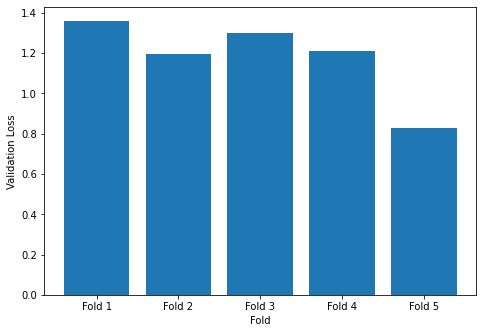

In [58]:

# Plotting training and validation losses for all 5 folds of final cross validation.
folds = ["Fold 1", "Fold 2","Fold 3","Fold 4","Fold 5"]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(folds,final1)
plt.xlabel('Fold')
plt.ylabel('Train Loss')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(folds,final2)
plt.xlabel('Fold')
plt.ylabel('Validation Loss')
plt.show()


Iteration 1, loss = 2.81904306
Iteration 2, loss = 1.72929733
Iteration 3, loss = 1.55723652
Iteration 4, loss = 1.46113117
Iteration 5, loss = 1.36624632
Iteration 6, loss = 1.61647903
Iteration 7, loss = 1.42961300
Iteration 8, loss = 1.29786372
Iteration 9, loss = 1.22872295
Iteration 10, loss = 1.18753759
Iteration 11, loss = 1.39518742
Iteration 12, loss = 1.20098669
Iteration 13, loss = 1.16605834
Iteration 14, loss = 1.14100861
Iteration 15, loss = 1.14474831
Iteration 16, loss = 1.45240810
Iteration 17, loss = 1.33516947
Iteration 18, loss = 1.13891192
Iteration 19, loss = 1.08138533
Iteration 20, loss = 1.14649678
Iteration 21, loss = 1.12424463
Iteration 22, loss = 1.02148404
Iteration 23, loss = 1.26383254
Iteration 24, loss = 1.62996623
Iteration 25, loss = 1.11548576
Iteration 26, loss = 1.06753212
Iteration 27, loss = 0.99181915
Iteration 28, loss = 1.13115066
Iteration 29, loss = 0.96119464
Iteration 30, loss = 0.97950443
Iteration 31, loss = 1.44029734
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

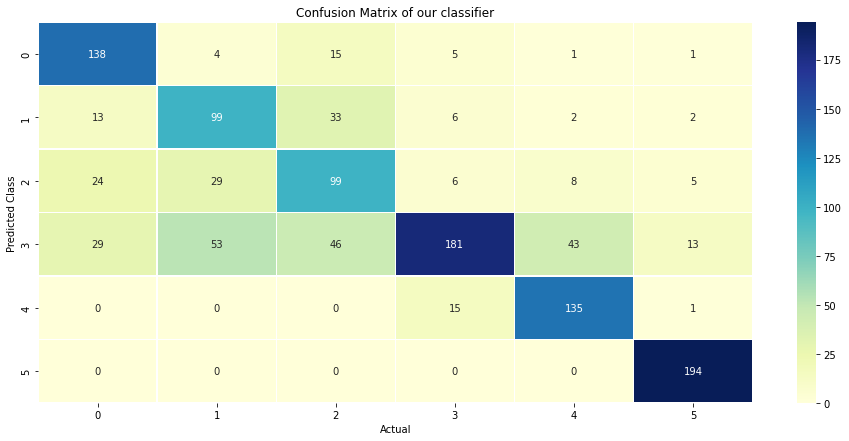


	Accuracy score = 0.705

		CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.68      0.84      0.75       164
           1       0.54      0.64      0.58       155
           2       0.51      0.58      0.54       171
           3       0.85      0.50      0.63       365
           4       0.71      0.89      0.79       151
           5       0.90      1.00      0.95       194

    accuracy                           0.70      1200
   macro avg       0.70      0.74      0.71      1200
weighted avg       0.73      0.70      0.70      1200



In [59]:
# Fitting our model
clf.fit(train_bow, btrain_y)
# Predicting and evaluating on test data

y_pred = clf.predict(test_bow)
printing_confusion_matrix(btest_y, y_pred)

In [60]:
# Repeating for embeddings

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as plt

a_range = ['relu', 'logistic', 'tanh', 'identity']
edata_val = {}
edata_tra = {}

for a in a_range:
    clf = MLPClassifier(hidden_layer_sizes=(100,500,100), max_iter = 100, activation = a, learning_rate = 'adaptive', verbose='true')
    training_loss = cross_validate(clf, etrainX, etrain_y, cv=5, return_train_score = True, scoring='neg_mean_squared_error')
    edata_tra[a] = abs(training_loss['train_score']).mean()
    edata_val[a] = abs(training_loss['test_score']).mean()


Iteration 1, loss = 1.65111410
Iteration 2, loss = 1.03185325
Iteration 3, loss = 0.75705897
Iteration 4, loss = 0.64195847
Iteration 5, loss = 0.55652311
Iteration 6, loss = 0.51311931
Iteration 7, loss = 0.47668284
Iteration 8, loss = 0.43359396
Iteration 9, loss = 0.40276638
Iteration 10, loss = 0.37038710
Iteration 11, loss = 0.34224679
Iteration 12, loss = 0.31687152
Iteration 13, loss = 0.30964901
Iteration 14, loss = 0.27164871
Iteration 15, loss = 0.25187618
Iteration 16, loss = 0.23579586
Iteration 17, loss = 0.20686908
Iteration 18, loss = 0.19075583
Iteration 19, loss = 0.18043481
Iteration 20, loss = 0.16092871
Iteration 21, loss = 0.15384190
Iteration 22, loss = 0.14043328
Iteration 23, loss = 0.13311891
Iteration 24, loss = 0.13591094
Iteration 25, loss = 0.12856956
Iteration 26, loss = 0.13031012
Iteration 27, loss = 0.12400963
Iteration 28, loss = 0.12722948
Iteration 29, loss = 0.11689247
Iteration 30, loss = 0.11623066
Iteration 31, loss = 0.11125511
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.81478949
Iteration 2, loss = 1.80067799
Iteration 3, loss = 1.79517511
Iteration 4, loss = 1.77799982
Iteration 5, loss = 1.71652170
Iteration 6, loss = 1.51747973
Iteration 7, loss = 1.27643965
Iteration 8, loss = 1.15228706
Iteration 9, loss = 1.09356843
Iteration 10, loss = 1.05523191
Iteration 11, loss = 1.02392356
Iteration 12, loss = 1.00076971
Iteration 13, loss = 0.97561707
Iteration 14, loss = 0.95278893
Iteration 15, loss = 0.92643412
Iteration 16, loss = 0.90294326
Iteration 17, loss = 0.87551223
Iteration 18, loss = 0.85241667
Iteration 19, loss = 0.82989447
Iteration 20, loss = 0.80428840
Iteration 21, loss = 0.78520439
Iteration 22, loss = 0.77801751
Iteration 23, loss = 0.76148690
Iteration 24, loss = 0.74299839
Iteration 25, loss = 0.72851691
Iteration 26, loss = 0.72290688
Iteration 27, loss = 0.71107296
Iteration 28, loss = 0.69813817
Iteration 29, loss = 0.69428113
Iteration 30, loss = 0.68354001
Iteration 31, loss = 0.67983397
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.80634805
Iteration 2, loss = 1.79792737
Iteration 3, loss = 1.79314557
Iteration 4, loss = 1.76345377
Iteration 5, loss = 1.64486908
Iteration 6, loss = 1.39501899
Iteration 7, loss = 1.23006517
Iteration 8, loss = 1.14208670
Iteration 9, loss = 1.09096307
Iteration 10, loss = 1.05166604
Iteration 11, loss = 1.02992741
Iteration 12, loss = 1.01112943
Iteration 13, loss = 0.98960995
Iteration 14, loss = 0.97633489
Iteration 15, loss = 0.96409023
Iteration 16, loss = 0.94887686
Iteration 17, loss = 0.93388865
Iteration 18, loss = 0.92264616
Iteration 19, loss = 0.91253903
Iteration 20, loss = 0.89742460
Iteration 21, loss = 0.88004941
Iteration 22, loss = 0.87010761
Iteration 23, loss = 0.85237816
Iteration 24, loss = 0.85368480
Iteration 25, loss = 0.82729043
Iteration 26, loss = 0.83190540
Iteration 27, loss = 0.80670189
Iteration 28, loss = 0.78974756
Iteration 29, loss = 0.78949657
Iteration 30, loss = 0.77486246
Iteration 31, loss = 0.76757624
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.80371445
Iteration 2, loss = 1.79674158
Iteration 3, loss = 1.79484625
Iteration 4, loss = 1.76352399
Iteration 5, loss = 1.63095017
Iteration 6, loss = 1.35809804
Iteration 7, loss = 1.19743751
Iteration 8, loss = 1.12540273
Iteration 9, loss = 1.08046127
Iteration 10, loss = 1.04761696
Iteration 11, loss = 1.02150928
Iteration 12, loss = 1.00225119
Iteration 13, loss = 0.98546757
Iteration 14, loss = 0.97424375
Iteration 15, loss = 0.95512171
Iteration 16, loss = 0.94385822
Iteration 17, loss = 0.93517574
Iteration 18, loss = 0.92134643
Iteration 19, loss = 0.89566368
Iteration 20, loss = 0.87967134
Iteration 21, loss = 0.85244187
Iteration 22, loss = 0.83413507
Iteration 23, loss = 0.81660159
Iteration 24, loss = 0.79883530
Iteration 25, loss = 0.77597917
Iteration 26, loss = 0.76502514
Iteration 27, loss = 0.74945897
Iteration 28, loss = 0.74317308
Iteration 29, loss = 0.73446119
Iteration 30, loss = 0.72636306
Iteration 31, loss = 0.71351812
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.80352868
Iteration 2, loss = 1.79696085
Iteration 3, loss = 1.79322849
Iteration 4, loss = 1.76004939
Iteration 5, loss = 1.61406755
Iteration 6, loss = 1.35647624
Iteration 7, loss = 1.20720649
Iteration 8, loss = 1.13130553
Iteration 9, loss = 1.08835553
Iteration 10, loss = 1.05790301
Iteration 11, loss = 1.03425778
Iteration 12, loss = 1.02439427
Iteration 13, loss = 1.00506100
Iteration 14, loss = 0.98661684
Iteration 15, loss = 0.97167846
Iteration 16, loss = 0.95223597
Iteration 17, loss = 0.94048256
Iteration 18, loss = 0.92315548
Iteration 19, loss = 0.90081676
Iteration 20, loss = 0.87604972
Iteration 21, loss = 0.85313420
Iteration 22, loss = 0.83230800
Iteration 23, loss = 0.81350089
Iteration 24, loss = 0.79912944
Iteration 25, loss = 0.78599195
Iteration 26, loss = 0.77631864
Iteration 27, loss = 0.77006112
Iteration 28, loss = 0.75854175
Iteration 29, loss = 0.75764025
Iteration 30, loss = 0.74261887
Iteration 31, loss = 0.73689811
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.29222934
Iteration 2, loss = 0.77030188
Iteration 3, loss = 0.63866388
Iteration 4, loss = 0.56326776
Iteration 5, loss = 0.52557035
Iteration 6, loss = 0.49292712
Iteration 7, loss = 0.46058236
Iteration 8, loss = 0.44654904
Iteration 9, loss = 0.42455097
Iteration 10, loss = 0.41284230
Iteration 11, loss = 0.40721687
Iteration 12, loss = 0.40016477
Iteration 13, loss = 0.39167904
Iteration 14, loss = 0.38303063
Iteration 15, loss = 0.37575579
Iteration 16, loss = 0.36343683
Iteration 17, loss = 0.36309460
Iteration 18, loss = 0.34638781
Iteration 19, loss = 0.35348200
Iteration 20, loss = 0.33437430
Iteration 21, loss = 0.34427241
Iteration 22, loss = 0.33266590
Iteration 23, loss = 0.33213923
Iteration 24, loss = 0.33117210
Iteration 25, loss = 0.31828296
Iteration 26, loss = 0.31478589
Iteration 27, loss = 0.32140926
Iteration 28, loss = 0.30104043
Iteration 29, loss = 0.29986860
Iteration 30, loss = 0.29950173
Iteration 31, loss = 0.29571522
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.33307930
Iteration 2, loss = 0.77693674
Iteration 3, loss = 0.64448113
Iteration 4, loss = 0.56515344
Iteration 5, loss = 0.52691551
Iteration 6, loss = 0.49189563
Iteration 7, loss = 0.46846707
Iteration 8, loss = 0.44385238
Iteration 9, loss = 0.43528981
Iteration 10, loss = 0.41599695
Iteration 11, loss = 0.40755907
Iteration 12, loss = 0.40132644
Iteration 13, loss = 0.37846937
Iteration 14, loss = 0.37887236
Iteration 15, loss = 0.38717930
Iteration 16, loss = 0.37326703
Iteration 17, loss = 0.36700161
Iteration 18, loss = 0.35816581
Iteration 19, loss = 0.37764345
Iteration 20, loss = 0.35039191
Iteration 21, loss = 0.35486375
Iteration 22, loss = 0.34503376
Iteration 23, loss = 0.33713430
Iteration 24, loss = 0.32708764
Iteration 25, loss = 0.31984714
Iteration 26, loss = 0.32085500
Iteration 27, loss = 0.32903054
Iteration 28, loss = 0.31799565
Iteration 29, loss = 0.32140405
Iteration 30, loss = 0.32945851
Iteration 31, loss = 0.31690771
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.31701185
Iteration 2, loss = 0.74694153
Iteration 3, loss = 0.61111677
Iteration 4, loss = 0.54601340
Iteration 5, loss = 0.51229985
Iteration 6, loss = 0.47899987
Iteration 7, loss = 0.45727465
Iteration 8, loss = 0.45205637
Iteration 9, loss = 0.42051170
Iteration 10, loss = 0.42154772
Iteration 11, loss = 0.40832578
Iteration 12, loss = 0.39452863
Iteration 13, loss = 0.38746366
Iteration 14, loss = 0.36895089
Iteration 15, loss = 0.36013048
Iteration 16, loss = 0.35265450
Iteration 17, loss = 0.35331493
Iteration 18, loss = 0.34711744
Iteration 19, loss = 0.34856629
Iteration 20, loss = 0.33845796
Iteration 21, loss = 0.33446478
Iteration 22, loss = 0.32289310
Iteration 23, loss = 0.33028474
Iteration 24, loss = 0.33759165
Iteration 25, loss = 0.31619365
Iteration 26, loss = 0.32001106
Iteration 27, loss = 0.33164535
Iteration 28, loss = 0.30379639
Iteration 29, loss = 0.29942770
Iteration 30, loss = 0.29944865
Iteration 31, loss = 0.30590660
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.30794898
Iteration 2, loss = 0.76029433
Iteration 3, loss = 0.62916006
Iteration 4, loss = 0.56597529
Iteration 5, loss = 0.51837603
Iteration 6, loss = 0.50662044
Iteration 7, loss = 0.46077176
Iteration 8, loss = 0.44425923
Iteration 9, loss = 0.42776692
Iteration 10, loss = 0.41503358
Iteration 11, loss = 0.40098903
Iteration 12, loss = 0.39414022
Iteration 13, loss = 0.39282186
Iteration 14, loss = 0.37864800
Iteration 15, loss = 0.36804028
Iteration 16, loss = 0.37467668
Iteration 17, loss = 0.35663693
Iteration 18, loss = 0.35429685
Iteration 19, loss = 0.34423782
Iteration 20, loss = 0.34486333
Iteration 21, loss = 0.34826315
Iteration 22, loss = 0.33393020
Iteration 23, loss = 0.32377753
Iteration 24, loss = 0.33427284
Iteration 25, loss = 0.35256765
Iteration 26, loss = 0.32791976
Iteration 27, loss = 0.32626665
Iteration 28, loss = 0.30876562
Iteration 29, loss = 0.30655739
Iteration 30, loss = 0.30818024
Iteration 31, loss = 0.30333037
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.32935370
Iteration 2, loss = 0.76775290
Iteration 3, loss = 0.63356934
Iteration 4, loss = 0.56488786
Iteration 5, loss = 0.53361677
Iteration 6, loss = 0.49653179
Iteration 7, loss = 0.47309879
Iteration 8, loss = 0.45328293
Iteration 9, loss = 0.44150642
Iteration 10, loss = 0.41407763
Iteration 11, loss = 0.40159816
Iteration 12, loss = 0.40263555
Iteration 13, loss = 0.39727375
Iteration 14, loss = 0.38004876
Iteration 15, loss = 0.37117643
Iteration 16, loss = 0.36947037
Iteration 17, loss = 0.35834564
Iteration 18, loss = 0.36408599
Iteration 19, loss = 0.35103849
Iteration 20, loss = 0.34494841
Iteration 21, loss = 0.33819873
Iteration 22, loss = 0.34188206
Iteration 23, loss = 0.33135771
Iteration 24, loss = 0.33366291
Iteration 25, loss = 0.32142435
Iteration 26, loss = 0.32132613
Iteration 27, loss = 0.32641335
Iteration 28, loss = 0.33223316
Iteration 29, loss = 0.32547051
Iteration 30, loss = 0.30399073
Iteration 31, loss = 0.30506425
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 1, loss = 1.33597313
Iteration 2, loss = 0.76285059
Iteration 3, loss = 0.63150029
Iteration 4, loss = 0.56011951
Iteration 5, loss = 0.51608893
Iteration 6, loss = 0.48345777
Iteration 7, loss = 0.46341130
Iteration 8, loss = 0.44243444
Iteration 9, loss = 0.42008961
Iteration 10, loss = 0.42394573
Iteration 11, loss = 0.39823996
Iteration 12, loss = 0.38567181
Iteration 13, loss = 0.39506986
Iteration 14, loss = 0.37139856
Iteration 15, loss = 0.36360098
Iteration 16, loss = 0.35648059
Iteration 17, loss = 0.35039143
Iteration 18, loss = 0.34353334
Iteration 19, loss = 0.33977006
Iteration 20, loss = 0.33872238
Iteration 21, loss = 0.34482229
Iteration 22, loss = 0.34113300
Iteration 23, loss = 0.33866168
Iteration 24, loss = 0.32977711
Iteration 25, loss = 0.33042363
Iteration 26, loss = 0.33675968
Iteration 27, loss = 0.32261115
Iteration 28, loss = 0.30994115
Iteration 29, loss = 0.31447182
Iteration 30, loss = 0.31050020
Iteration 31, loss = 0.31224138
Iteration 32, los

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Iteration 2, loss = 0.75286302
Iteration 3, loss = 0.61166832
Iteration 4, loss = 0.54299878
Iteration 5, loss = 0.51154490
Iteration 6, loss = 0.47031945
Iteration 7, loss = 0.44441042
Iteration 8, loss = 0.43666996
Iteration 9, loss = 0.41165592
Iteration 10, loss = 0.40472582
Iteration 11, loss = 0.39422202
Iteration 12, loss = 0.38086501
Iteration 13, loss = 0.37650511
Iteration 14, loss = 0.37574940
Iteration 15, loss = 0.35581267
Iteration 16, loss = 0.35204060
Iteration 17, loss = 0.35275160
Iteration 18, loss = 0.34477282
Iteration 19, loss = 0.35576069
Iteration 20, loss = 0.34490324
Iteration 21, loss = 0.33497999
Iteration 22, loss = 0.33323588
Iteration 23, loss = 0.32863676
Iteration 24, loss = 0.32512481
Iteration 25, loss = 0.34065258
Iteration 26, loss = 0.31974893
Iteration 27, loss = 0.30926947
Iteration 28, loss = 0.30849241
Iteration 29, loss = 0.31658791
Iteration 30, loss = 0.30326571
Iteration 31, loss = 0.29932799
Iteration 32, loss = 0.30628445
Iteration 33, lo

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


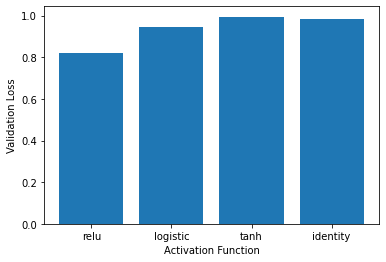

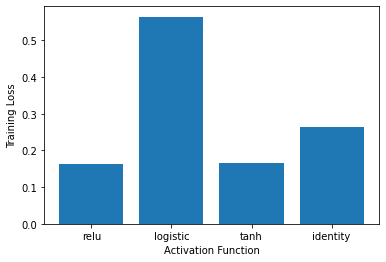

In [61]:
# Repeating for embeddings

import matplotlib.pyplot as plt

names = list(edata_val.keys())
values = list(edata_val.values())

plt.bar(range(len(edata_val)), values, tick_label=names)
plt.xlabel("Activation Function")
plt.ylabel("Validation Loss")
plt.show()

names = list(edata_tra.keys())
values = list(edata_tra.values())

plt.bar(range(len(edata_tra)), values, tick_label=names)
plt.xlabel("Activation Function")
plt.ylabel("Training Loss")
plt.show()

In [62]:
# Repeating for embeddings

clf = MLPClassifier(hidden_layer_sizes=(100,500,100), max_iter = 100, alpha = 0.00001 ,activation = 'relu', learning_rate = 'adaptive', verbose='true')

training_loss_final = cross_validate(clf, etrainX, etrain_y, cv=5, return_train_score = True, scoring='neg_mean_squared_error')
final1 = abs(training_loss_final['train_score'])
final2 = abs(training_loss_final['test_score'])


Iteration 1, loss = 1.63874555
Iteration 2, loss = 1.01273133
Iteration 3, loss = 0.74207299
Iteration 4, loss = 0.61817921
Iteration 5, loss = 0.55038788
Iteration 6, loss = 0.49298497
Iteration 7, loss = 0.45762178
Iteration 8, loss = 0.41702444
Iteration 9, loss = 0.38694879
Iteration 10, loss = 0.35040383
Iteration 11, loss = 0.32037967
Iteration 12, loss = 0.29775358
Iteration 13, loss = 0.26050343
Iteration 14, loss = 0.24004936
Iteration 15, loss = 0.21878858
Iteration 16, loss = 0.19328361
Iteration 17, loss = 0.18678677
Iteration 18, loss = 0.16294516
Iteration 19, loss = 0.15180544
Iteration 20, loss = 0.14411034
Iteration 21, loss = 0.13565403
Iteration 22, loss = 0.13107432
Iteration 23, loss = 0.12411781
Iteration 24, loss = 0.12383966
Iteration 25, loss = 0.12579173
Iteration 26, loss = 0.12156397
Iteration 27, loss = 0.11765888
Iteration 28, loss = 0.11539055
Iteration 29, loss = 0.11029691
Iteration 30, loss = 0.10985951
Iteration 31, loss = 0.11117630
Iteration 32, los

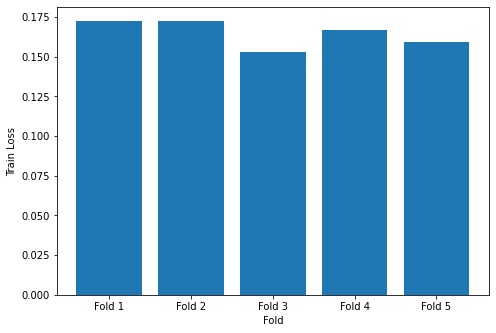

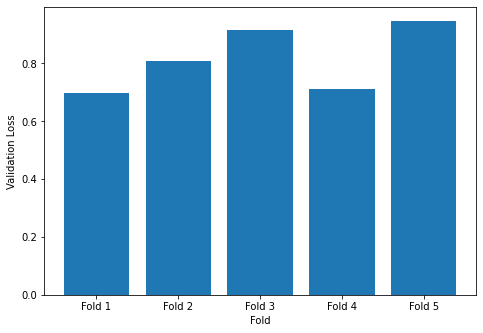

In [63]:
# Plotting training and validation losses for all 5 folds of final cross validation.

folds = ["Fold 1", "Fold 2","Fold 3","Fold 4","Fold 5"]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(folds,final1)
plt.xlabel('Fold')
plt.ylabel('Train Loss')
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(folds,final2)
plt.xlabel('Fold')
plt.ylabel('Validation Loss')
plt.show()

Iteration 1, loss = 1.55785166
Iteration 2, loss = 0.87507205
Iteration 3, loss = 0.66643428
Iteration 4, loss = 0.57647305
Iteration 5, loss = 0.53686660
Iteration 6, loss = 0.47687470
Iteration 7, loss = 0.43818175
Iteration 8, loss = 0.40964843
Iteration 9, loss = 0.37714558
Iteration 10, loss = 0.34543902
Iteration 11, loss = 0.32757976
Iteration 12, loss = 0.29218744
Iteration 13, loss = 0.26632495
Iteration 14, loss = 0.24369831
Iteration 15, loss = 0.22083895
Iteration 16, loss = 0.20662273
Iteration 17, loss = 0.18441142
Iteration 18, loss = 0.16190199
Iteration 19, loss = 0.14817643
Iteration 20, loss = 0.14484435
Iteration 21, loss = 0.14150773
Iteration 22, loss = 0.12527974
Iteration 23, loss = 0.12325206
Iteration 24, loss = 0.12640044
Iteration 25, loss = 0.12213613
Iteration 26, loss = 0.11765380
Iteration 27, loss = 0.11988000
Iteration 28, loss = 0.11330671
Iteration 29, loss = 0.11483645
Iteration 30, loss = 0.11285094
Iteration 31, loss = 0.11201626
Iteration 32, los

<Figure size 432x288 with 0 Axes>

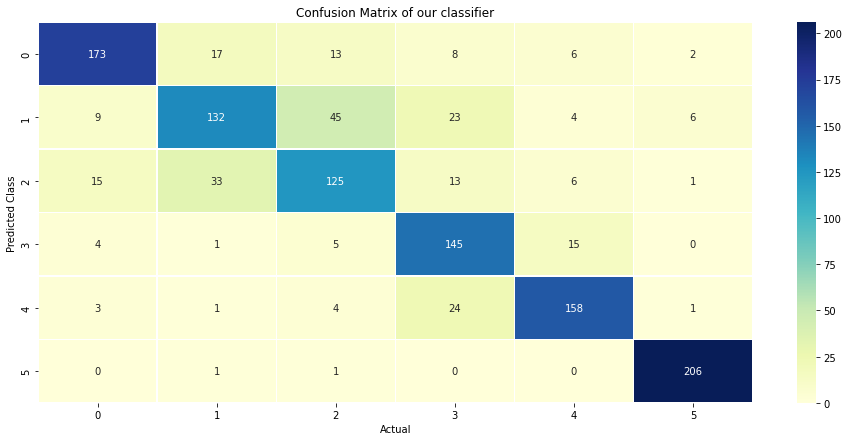


	Accuracy score = 0.7825

		CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.85      0.79      0.82       219
           1       0.71      0.60      0.65       219
           2       0.65      0.65      0.65       193
           3       0.68      0.85      0.76       170
           4       0.84      0.83      0.83       191
           5       0.95      0.99      0.97       208

    accuracy                           0.78      1200
   macro avg       0.78      0.79      0.78      1200
weighted avg       0.78      0.78      0.78      1200



In [64]:
# Fitting our model
clf.fit(etrainX, etrain_y)
# Predicting and evaluating on test data
y_pred = clf.predict(etestX)
printing_confusion_matrix(etest_y, y_pred)

#Task 4: Ensemble Methods

<Figure size 432x288 with 0 Axes>

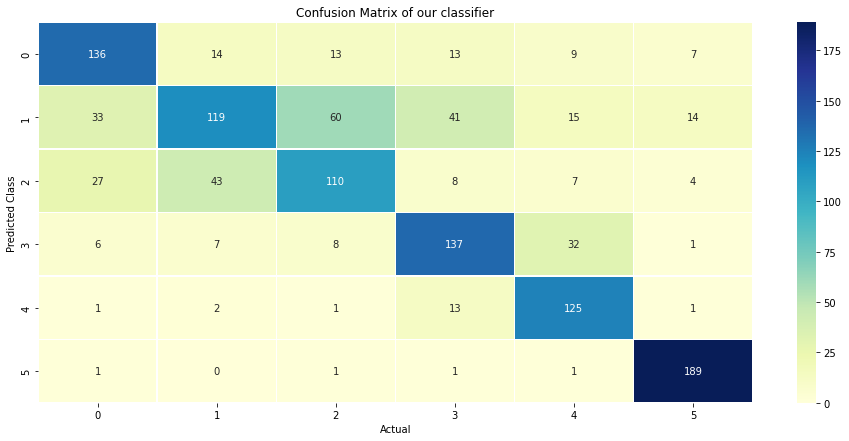


	Accuracy score = 0.68

		CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.67      0.71      0.69       192
           1       0.64      0.42      0.51       282
           2       0.57      0.55      0.56       199
           3       0.64      0.72      0.68       191
           4       0.66      0.87      0.75       143
           5       0.88      0.98      0.92       193

    accuracy                           0.68      1200
   macro avg       0.68      0.71      0.69      1200
weighted avg       0.67      0.68      0.67      1200



In [65]:
# Used boosting classifer on bag of word features as it had the best accuracy

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

# Used a 10000 estimators
clf = AdaBoostClassifier(n_estimators=10000)
clf.fit(train_bow, btrain_y)
y_pred = clf.predict(test_bow)

printing_confusion_matrix(btest_y, y_pred)

<Figure size 432x288 with 0 Axes>

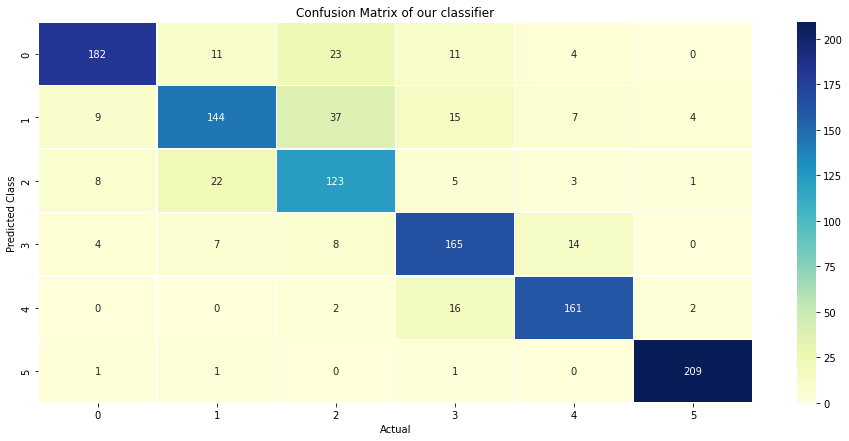


	Accuracy score = 0.82

		CLASSIFICATION REPORT:

               precision    recall  f1-score   support

           0       0.89      0.79      0.84       231
           1       0.78      0.67      0.72       216
           2       0.64      0.76      0.69       162
           3       0.77      0.83      0.80       198
           4       0.85      0.89      0.87       181
           5       0.97      0.99      0.98       212

    accuracy                           0.82      1200
   macro avg       0.82      0.82      0.82      1200
weighted avg       0.83      0.82      0.82      1200



In [66]:
# Used bagging classifer on embeded features as it had the best accuracy

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Used 1000 estimators, along with 50% samples and features
clf = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors=4, metric = "euclidean"), n_estimators=1000, random_state=4, max_samples = 0.5, max_features = 0.5).fit(etrainX, etrain_y)
y_pred = clf.predict(etestX)

printing_confusion_matrix(etest_y, y_pred)